In [358]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy.stats as st

In [359]:
dataset = pd.read_csv('demand.csv')

In [360]:
noCovidDS = dataset.loc[dataset.covid ==0]

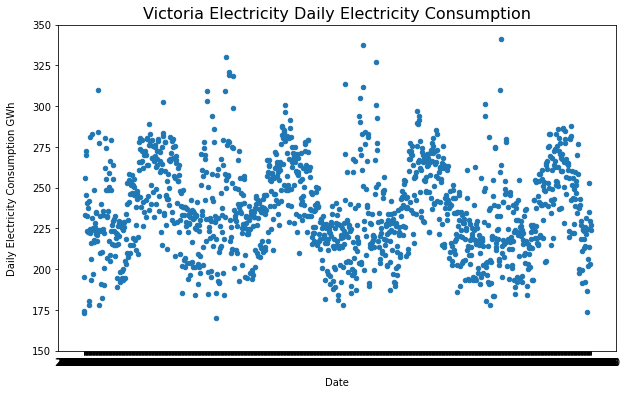

In [361]:
ax2 = dataset.plot.scatter(figsize=(10, 6), x='Date', y='Demand_GWh',ylim=(150,350))
plt.xlabel("Date", labelpad=10)
plt.ylabel("Daily Electricity Consumption GWh", labelpad=15)
plt.title("Victoria Electricity Daily Electricity Consumption", fontsize=16);
plt.show()

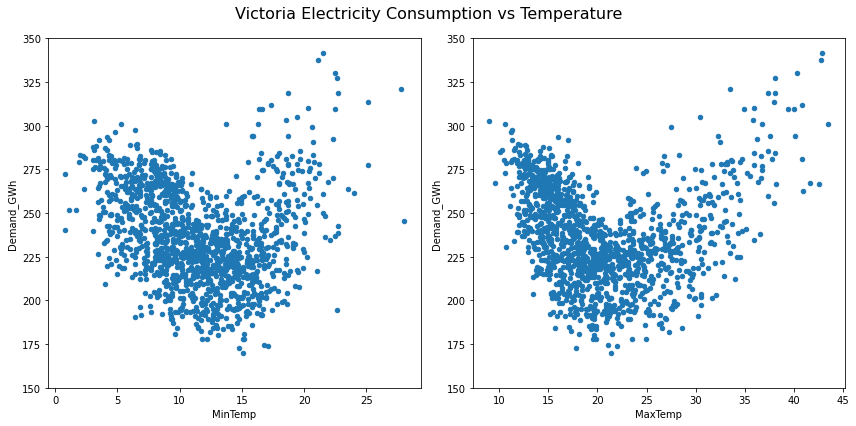

In [362]:

figure, axes = plt.subplots(1, 2)
dataset.plot.scatter(ax=axes[0], x='MinTemp', y='Demand_GWh',ylim=(150,350))
dataset.plot.scatter(ax=axes[1], x='MaxTemp', y='Demand_GWh',ylim=(150,350))
figure.set_figheight(6)
figure.set_figwidth(12)
figure.suptitle("Victoria Electricity Consumption vs Temperature", fontsize=16);
plt.tight_layout()

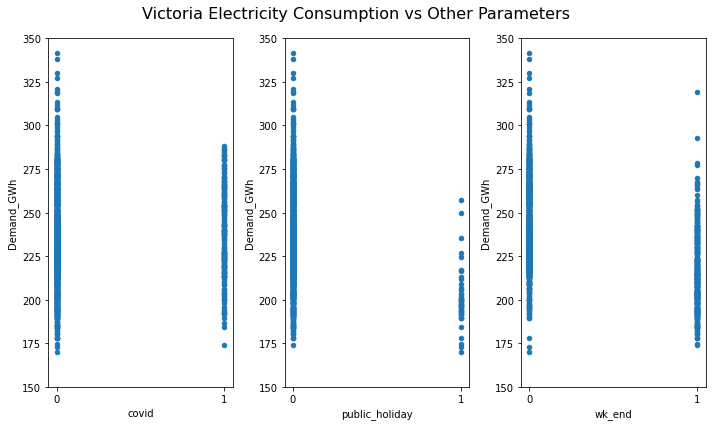

In [363]:
figure, axes = plt.subplots(1, 3)
dataset.plot.scatter(ax=axes[0], x='covid', y='Demand_GWh',ylim=(150,350))
dataset.plot.scatter(ax=axes[1], x='public_holiday', y='Demand_GWh',ylim=(150,350))
dataset.plot.scatter(ax=axes[2], x='wk_end', y='Demand_GWh',ylim=(150,350))
# plt.xticks(np.arange(0, 2))
plt.setp(axes, xticks=[0,1], xticklabels=['0', '1'])
figure.set_figheight(6)
figure.set_figwidth(10)
figure.suptitle("Victoria Electricity Consumption vs Other Parameters", fontsize=16);
plt.tight_layout()


Statistical Significance 

In [364]:
st.ttest_ind(dataset.loc[dataset.covid == 0]['Demand_GWh'].sample(n = 50), dataset.loc[dataset.covid == 1]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=-0.04091974982699583, pvalue=0.9674443811322968)

In [365]:
st.ttest_ind(dataset.loc[dataset.public_holiday == 0]['Demand_GWh'].sample(n = 20), dataset.loc[dataset.public_holiday == 1]['Demand_GWh'].sample(n = 20), equal_var=False)

Ttest_indResult(statistic=4.129475584075377, pvalue=0.0002396296857378249)

In [366]:
st.ttest_ind(dataset.loc[dataset.wk_end == 0]['Demand_GWh'].sample(n = 50), dataset.loc[dataset.wk_end == 1]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=8.340993195109581, pvalue=5.114230516878099e-13)

In [367]:
st.ttest_ind(dataset.loc[((dataset.MinTemp >= 5) & (dataset.MinTemp < 10)) ]['Demand_GWh'].sample(n = 50), dataset.loc[((dataset.MinTemp >= 10) & (dataset.MinTemp < 15))]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=4.4412271899593385, pvalue=2.3657642835939733e-05)

In [368]:
st.ttest_ind(dataset.loc[((dataset.MaxTemp >= 10) & (dataset.MaxTemp < 15)) ]['Demand_GWh'].sample(n = 50), dataset.loc[((dataset.MaxTemp >= 15) & (dataset.MaxTemp < 20))]['Demand_GWh'].sample(n = 50), equal_var=False)

Ttest_indResult(statistic=5.242040561383898, pvalue=1.0085815567953732e-06)

In [369]:
st.ttest_ind(dataset.loc[dataset.Population == 6244863]['Demand_GWh'].sample(n = 20), dataset.loc[dataset.Population == 6689377]['Demand_GWh'].sample(n = 20), equal_var=False)

Ttest_indResult(statistic=0.5906827551040508, pvalue=0.5582438534338368)

# Electricity Demand Modelling

In [370]:
X = dataset[["MinTemp","MaxTemp","wk_end","public_holiday","Population","covid","year","month","day"]]
X2 = dataset[["MinTemp","MaxTemp","wk_end","public_holiday","Population","year","month","day"]]
y = dataset["Demand_GWh"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=42)
print(X.shape, y.shape)

(1369, 9) (1369, 1)


In [371]:
X3 = noCovidDS[["MinTemp","MaxTemp","wk_end","public_holiday","Population","year","month","day"]]
y3 = noCovidDS["Demand_GWh"].values.reshape(-1, 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [372]:
X_train.head()

MinTemp  MaxTemp  wk_end  public_holiday  Population  covid  year  \
1117     12.9     22.6       0               0     6655284      0  2020   
785      18.0     34.2       0               0     6528601      0  2019   
96       12.7     26.2       0               0     6292584      0  2017   
415      14.1     29.5       0               0     6387081      0  2018   
350      15.7     24.5       1               0     6387081      0  2017   

      month  day  
1117      1   23  
785       2   25  
96        4    7  
415       2   20  
350      12   17

In [373]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_train_scaled = StandardScaler().fit_transform(X_train.values)
X_test_scaled = StandardScaler().fit_transform(X_test.values)
X2_train_scaled = StandardScaler().fit_transform(X2_train.values)
X2_test_scaled = StandardScaler().fit_transform(X2_test.values)
X3_train_scaled = StandardScaler().fit_transform(X3_train.values)
X3_test_scaled = StandardScaler().fit_transform(X3_test.values)

In [374]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [375]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.33589340101606846
Testing Score: 0.3849388307520464


In [376]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_train_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 496.28987875761584
R-squared (R2 ): 0.33589340101606846


# SGD

In [377]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

C:\ProgramData\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


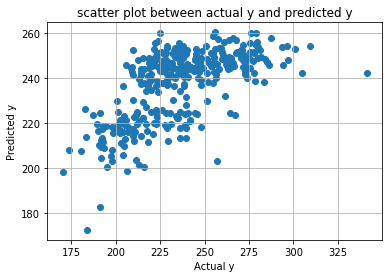

Mean Squared Error : 448.07120462189636
Mean Absolute Error : 17.408793348210516


In [378]:
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(X_train_scaled, y_train)
plt.scatter(y_test,clf_.predict(X_test_scaled))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(X_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(X_test_scaled)))

# Deep Neural Network

In [379]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

Nh = Ns/(α∗ (Ni + No))

Nh = Number of hidden layers.
Ni = number of input neurons.
No = number of output neurons.
Ns = number of samples in training data set.
α = an arbitrary scaling factor usually 2-10.

In [380]:
def create_model(optimizer='adam',input_dim=9):
    # Create model and add layers
    model = Sequential()

    # Adding the input layer and the first hidden layer
    # model.add(Dense(128, activation = 'relu', input_dim = 11))
    model.add(Dense(64, activation = 'relu', input_dim = input_dim))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 64, activation = 'relu'))

    # Adding the output layer
    # model.add(Dense(units = 1))
    model.add(Dense(1, activation="relu"))
    # Compile and fit the model
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

batch_size = [5, 6, 7, 8, 9, 10, 15, 20]
epochs = [10, 25, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)

grid_result = grid.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

predictions = grid.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

In [381]:
model1 = create_model()
history = model1.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    batch_size = 6,
#     shuffle=True,
    verbose=1
)

Train on 1026 samples
Epoch 1/200
1026/1026 [==============================] - 1s 1ms/sample - loss: 10035.8921
Epoch 2/200
1026/1026 [==============================] - 0s 300us/sample - loss: 565.8946
Epoch 3/200
1026/1026 [==============================] - 0s 292us/sample - loss: 311.7672
Epoch 4/200
1026/1026 [==============================] - 0s 306us/sample - loss: 235.7977
Epoch 5/200
1026/1026 [==============================] - 0s 303us/sample - loss: 204.9226
Epoch 6/200
1026/1026 [==============================] - 0s 292us/sample - loss: 175.2373
Epoch 7/200
1026/1026 [==============================] - 0s 306us/sample - loss: 198.6824
Epoch 8/200
1026/1026 [==============================] - 0s 293us/sample - loss: 174.1150
Epoch 9/200
1026/1026 [==============================] - 0s 283us/sample - loss: 158.6672
Epoch 10/200
1026/1026 [==============================] - 0s 294us/sample - loss: 170.5885
Epoch 11/200
1026/1026 [==============================] - 0s 288us/sample - l

1026/1026 [==============================] - 0s 270us/sample - loss: 78.8960
Epoch 92/200
1026/1026 [==============================] - 0s 280us/sample - loss: 84.3445
Epoch 93/200
1026/1026 [==============================] - 0s 268us/sample - loss: 61.6085
Epoch 94/200
1026/1026 [==============================] - 0s 272us/sample - loss: 65.1779
Epoch 95/200
1026/1026 [==============================] - 0s 276us/sample - loss: 72.7612
Epoch 96/200
1026/1026 [==============================] - 0s 271us/sample - loss: 78.6060
Epoch 97/200
1026/1026 [==============================] - 0s 267us/sample - loss: 75.3416
Epoch 98/200
1026/1026 [==============================] - 0s 266us/sample - loss: 69.2336
Epoch 99/200
1026/1026 [==============================] - 0s 275us/sample - loss: 55.2659
Epoch 100/200
1026/1026 [==============================] - 0s 272us/sample - loss: 55.4609
Epoch 101/200
1026/1026 [==============================] - 0s 273us/sample - loss: 64.4982
Epoch 102/200
1026/10

1026/1026 [==============================] - 0s 274us/sample - loss: 41.5103
Epoch 182/200
1026/1026 [==============================] - 0s 277us/sample - loss: 33.8867
Epoch 183/200
1026/1026 [==============================] - 0s 280us/sample - loss: 31.8912
Epoch 184/200
1026/1026 [==============================] - 0s 275us/sample - loss: 45.7695
Epoch 185/200
1026/1026 [==============================] - 0s 279us/sample - loss: 27.5919
Epoch 186/200
1026/1026 [==============================] - 0s 281us/sample - loss: 33.3015
Epoch 187/200
1026/1026 [==============================] - 0s 285us/sample - loss: 36.3275
Epoch 188/200
1026/1026 [==============================] - 0s 274us/sample - loss: 31.9521
Epoch 189/200
1026/1026 [==============================] - 0s 281us/sample - loss: 27.2924
Epoch 190/200
1026/1026 [==============================] - 0s 280us/sample - loss: 32.7462
Epoch 191/200
1026/1026 [==============================] - 0s 279us/sample - loss: 34.3517
Epoch 192/200

In [382]:
model2 = create_model(input_dim=8)
history = model2.fit(
    X2_train_scaled,
    y2_train,
    epochs=200,
    batch_size = 6,
#     shuffle=True,
    verbose=1
)

Train on 1026 samples
Epoch 1/200
1026/1026 [==============================] - 1s 937us/sample - loss: 12369.8834
Epoch 2/200
1026/1026 [==============================] - 0s 297us/sample - loss: 664.7373
Epoch 3/200
1026/1026 [==============================] - 0s 295us/sample - loss: 356.2841
Epoch 4/200
1026/1026 [==============================] - 0s 288us/sample - loss: 243.5575
Epoch 5/200
1026/1026 [==============================] - 0s 288us/sample - loss: 192.2710
Epoch 6/200
1026/1026 [==============================] - 0s 283us/sample - loss: 166.8043
Epoch 7/200
1026/1026 [==============================] - 0s 288us/sample - loss: 176.9702
Epoch 8/200
1026/1026 [==============================] - 0s 292us/sample - loss: 178.2515
Epoch 9/200
1026/1026 [==============================] - 0s 295us/sample - loss: 170.0327
Epoch 10/200
1026/1026 [==============================] - 0s 287us/sample - loss: 165.9796
Epoch 11/200
1026/1026 [==============================] - 0s 292us/sample -

1026/1026 [==============================] - 0s 301us/sample - loss: 58.3385
Epoch 92/200
1026/1026 [==============================] - 0s 331us/sample - loss: 63.3750
Epoch 93/200
1026/1026 [==============================] - 0s 301us/sample - loss: 67.9706
Epoch 94/200
1026/1026 [==============================] - 0s 285us/sample - loss: 82.1463
Epoch 95/200
1026/1026 [==============================] - 0s 289us/sample - loss: 69.4384
Epoch 96/200
1026/1026 [==============================] - 0s 288us/sample - loss: 59.5617
Epoch 97/200
1026/1026 [==============================] - 0s 300us/sample - loss: 59.8146
Epoch 98/200
1026/1026 [==============================] - 0s 287us/sample - loss: 62.2459
Epoch 99/200
1026/1026 [==============================] - 0s 284us/sample - loss: 61.5178
Epoch 100/200
1026/1026 [==============================] - 0s 323us/sample - loss: 63.2516
Epoch 101/200
1026/1026 [==============================] - 0s 306us/sample - loss: 67.2304
Epoch 102/200
1026/10

1026/1026 [==============================] - 0s 284us/sample - loss: 31.8642
Epoch 182/200
1026/1026 [==============================] - 0s 280us/sample - loss: 32.9978
Epoch 183/200
1026/1026 [==============================] - 0s 267us/sample - loss: 29.7986
Epoch 184/200
1026/1026 [==============================] - 0s 263us/sample - loss: 30.3222
Epoch 185/200
1026/1026 [==============================] - 0s 264us/sample - loss: 31.7800
Epoch 186/200
1026/1026 [==============================] - 0s 270us/sample - loss: 23.5525
Epoch 187/200
1026/1026 [==============================] - 0s 269us/sample - loss: 33.8962 - loss: 2
Epoch 188/200
1026/1026 [==============================] - 0s 267us/sample - loss: 41.1475
Epoch 189/200
1026/1026 [==============================] - 0s 278us/sample - loss: 41.3013
Epoch 190/200
1026/1026 [==============================] - 0s 274us/sample - loss: 46.7929
Epoch 191/200
1026/1026 [==============================] - 0s 312us/sample - loss: 47.2456
Epo

In [383]:
model3 = create_model(input_dim=8)
history = model3.fit(
    X3_train_scaled,
    y3_train,
    epochs=200,
    batch_size = 6,
#     shuffle=True,
    verbose=1
)

Train on 882 samples
Epoch 1/200
882/882 [==============================] - 1s 911us/sample - loss: 15350.7704
Epoch 2/200
882/882 [==============================] - 0s 303us/sample - loss: 687.3086
Epoch 3/200
882/882 [==============================] - 0s 298us/sample - loss: 374.1517
Epoch 4/200
882/882 [==============================] - 0s 294us/sample - loss: 293.2482
Epoch 5/200
882/882 [==============================] - 0s 302us/sample - loss: 208.0489
Epoch 6/200
882/882 [==============================] - 0s 286us/sample - loss: 207.0385
Epoch 7/200
882/882 [==============================] - 0s 282us/sample - loss: 173.3001
Epoch 8/200
882/882 [==============================] - 0s 295us/sample - loss: 167.6284
Epoch 9/200
882/882 [==============================] - 0s 296us/sample - loss: 145.7201
Epoch 10/200
882/882 [==============================] - 0s 282us/sample - loss: 162.2188
Epoch 11/200
882/882 [==============================] - 0s 297us/sample - loss: 138.0933
Epoch 1

882/882 [==============================] - 0s 313us/sample - loss: 109.3296
Epoch 94/200
882/882 [==============================] - 0s 297us/sample - loss: 81.8227
Epoch 95/200
882/882 [==============================] - 0s 289us/sample - loss: 128.7672
Epoch 96/200
882/882 [==============================] - 0s 280us/sample - loss: 59.4987
Epoch 97/200
882/882 [==============================] - 0s 285us/sample - loss: 103.7523
Epoch 98/200
882/882 [==============================] - 0s 301us/sample - loss: 76.1710
Epoch 99/200
882/882 [==============================] - 0s 279us/sample - loss: 58.3883
Epoch 100/200
882/882 [==============================] - 0s 287us/sample - loss: 58.9605
Epoch 101/200
882/882 [==============================] - 0s 289us/sample - loss: 87.7081
Epoch 102/200
882/882 [==============================] - 0s 289us/sample - loss: 61.2697
Epoch 103/200
882/882 [==============================] - 0s 282us/sample - loss: 71.7768
Epoch 104/200
882/882 [===============

882/882 [==============================] - 0s 268us/sample - loss: 40.2096
Epoch 186/200
882/882 [==============================] - 0s 276us/sample - loss: 42.5061
Epoch 187/200
882/882 [==============================] - 0s 262us/sample - loss: 38.7455
Epoch 188/200
882/882 [==============================] - 0s 267us/sample - loss: 30.3605
Epoch 189/200
882/882 [==============================] - 0s 265us/sample - loss: 39.0894
Epoch 190/200
882/882 [==============================] - 0s 273us/sample - loss: 33.8791
Epoch 191/200
882/882 [==============================] - 0s 269us/sample - loss: 27.8452
Epoch 192/200
882/882 [==============================] - 0s 265us/sample - loss: 39.9443
Epoch 193/200
882/882 [==============================] - 0s 265us/sample - loss: 41.2752
Epoch 194/200
882/882 [==============================] - 0s 268us/sample - loss: 36.5801
Epoch 195/200
882/882 [==============================] - 0s 280us/sample - loss: 39.4320
Epoch 196/200
882/882 [============

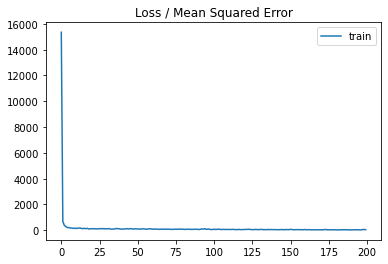

In [384]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [385]:
y_pred = model1.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.8391167256279477

In [386]:
# withiout covid as a parameter
y2_pred = model2.predict(X2_test_scaled)
r2_score(y2_test, y2_pred)

0.8548715999026676

In [387]:
y3_pred = model3.predict(X3_test_scaled)
r2_score(y3_test, y3_pred)

0.7511549065337384

In [388]:
y_train_pred = model1.predict(X_train_scaled)
r2_score(y_train, y_train_pred)

0.9576458580902227

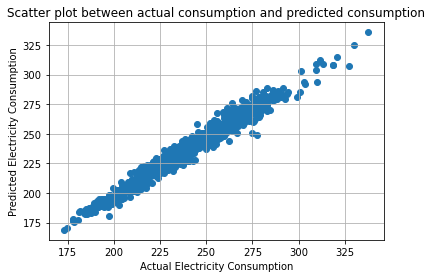

Mean Squared Error : 117.53443423634957
Mean Absolute Error : 8.262887831262532


In [389]:
plt.scatter(y_train,model1.predict(X_train_scaled))
plt.grid()
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.title('Scatter plot between actual consumption and predicted consumption')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, model1.predict(X_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y_test, model1.predict(X_test_scaled)))


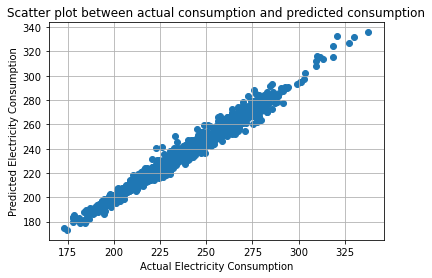

Mean Squared Error : 106.02459742098392
Mean Absolute Error : 7.868942820457705


In [390]:
plt.scatter(y2_train,model2.predict(X2_train_scaled))
plt.grid()
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.title('Scatter plot between actual consumption and predicted consumption')
plt.show()
print('Mean Squared Error :',mean_squared_error(y2_test, model2.predict(X2_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y2_test, model2.predict(X2_test_scaled)))

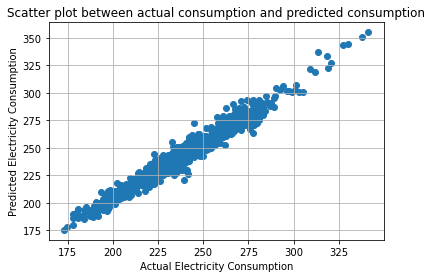

Mean Squared Error : 180.6020137996905
Mean Absolute Error : 10.608319468221856


In [391]:
plt.scatter(y3_train,model3.predict(X3_train_scaled))
plt.grid()
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.title('Scatter plot between actual consumption and predicted consumption')
plt.show()
print('Mean Squared Error :',mean_squared_error(y3_test, model3.predict(X3_test_scaled)))
print('Mean Absolute Error :',mean_absolute_error(y3_test, model3.predict(X3_test_scaled)))

In [392]:
model_loss = model1.evaluate(X_train_scaled, y_train, verbose=1)
# print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1026/1026 [==============================] - 0s 243us/sample - loss: 31.6514


In [393]:

diff = y_pred - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
print("[INFO] mean of the absolute percentage difference: {:.2f}%, std of the absolute percentage difference: {:.2f}%".format(mean, std))

[INFO] mean of the absolute percentage difference: 3.54%, std of the absolute percentage difference: 3.01%


In [394]:
diff = y2_pred - y2_test
percentDiff = (diff / y2_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean2 = np.mean(absPercentDiff)
std2 = np.std(absPercentDiff)
print("[INFO] mean of the absolute percentage difference: {:.2f}%, std of the absolute percentage difference: {:.2f}%".format(mean2, std2))

[INFO] mean of the absolute percentage difference: 3.39%, std of the absolute percentage difference: 2.95%


In [395]:
diff = y3_pred - y3_test
percentDiff = (diff / y3_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean3 = np.mean(absPercentDiff)
std3 = np.std(absPercentDiff)
print("[INFO] mean of the absolute percentage difference: {:.2f}%, std of the absolute percentage difference: {:.2f}%".format(mean3, std3))

[INFO] mean of the absolute percentage difference: 4.60%, std of the absolute percentage difference: 3.64%


In [396]:
y_test_df= pd.DataFrame(y2_test,columns= {'demand'})


In [397]:
X2_test = X2_test.reset_index()
df = pd.merge(X2_test, y_test_df, left_index=True, right_index=True)


In [398]:
y_pred_df= pd.DataFrame(y2_pred,columns= {'demand_prediction'})

In [399]:
df_demand = pd.merge(df, y_pred_df, left_index=True, right_index=True)

In [400]:
df_demand['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df_demand['Prediction_Variation'] = df_demand['demand_prediction'] - df_demand['demand']

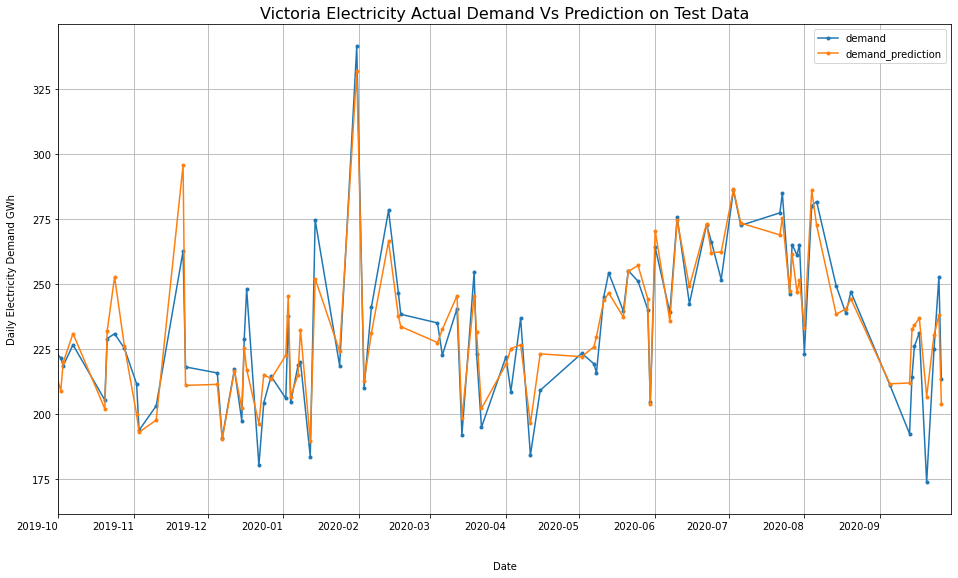

In [401]:
df_demand.plot.line(figsize=(16, 10),x="date", y=["demand", "demand_prediction"],rot=0,style='.-', xlim=('2019-10-01','2020-09-30'))
plt.xlabel("Date", labelpad=30)
plt.ylabel("Daily Electricity Demand GWh", labelpad=15)
plt.title("Victoria Electricity Actual Demand Vs Prediction on Test Data", fontsize=16);
plt.grid()
plt.show()

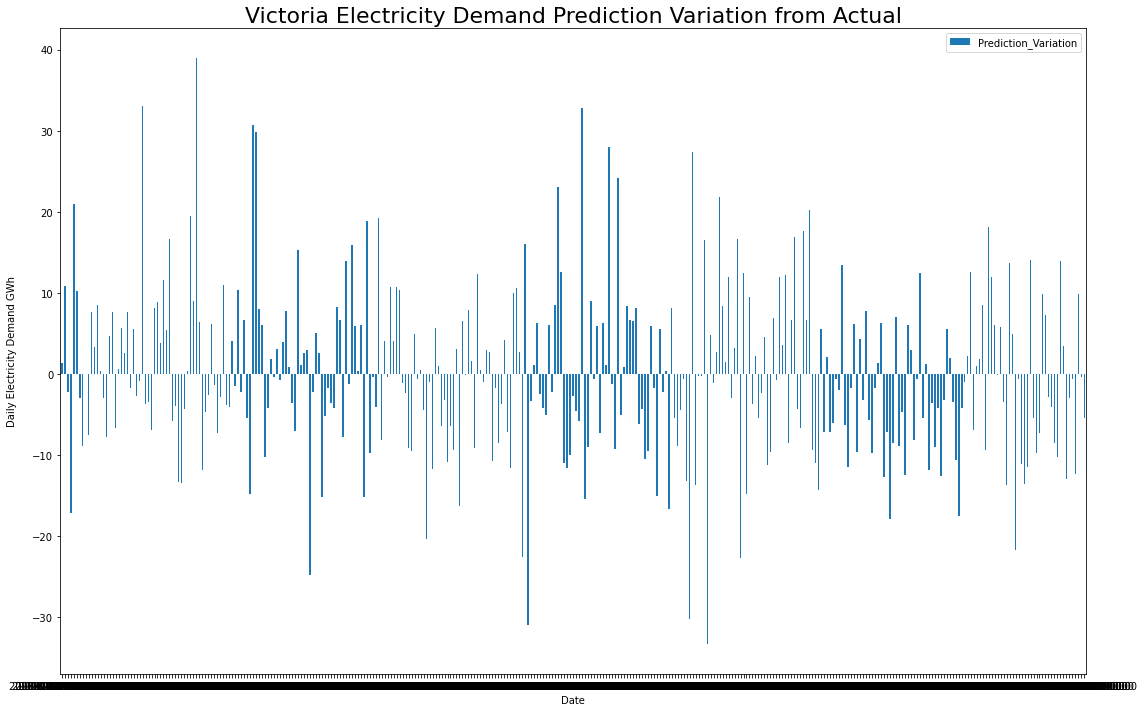

In [402]:
df_demand.plot.bar(figsize=(16, 10),x="date", y=["Prediction_Variation"])
plt.xlabel("Date")
plt.xticks(rotation='horizontal')
plt.ylabel("Daily Electricity Demand GWh", labelpad=15)
plt.title("Victoria Electricity Demand Prediction Variation from Actual", fontsize=22);
plt.tight_layout()
plt.show()